In [2]:
import pandas as pd

In [3]:
train_data=pd.read_csv("../datasets/assignment/train_set.csv")
test_data=pd.read_csv("../datasets/assignment/test_set.csv")

In [4]:
train_data

,userId,movieId,t,rating,preference
0,31231,1193,2001-03-14,5.0,1.0
1,32077,1284,1999-11-02,4.0,1.0
2,37618,368,2008-01-25,3.0,0.0
3,76002,490,1996-07-04,4.0,1.0
4,79452,2132,2012-05-16,3.0,0.0
...,...,...,...,...,...
15971861,127704,3505,2000-03-30,4.0,1.0
15971862,125972,1242,1999-12-14,4.0,1.0
15971863,64040,434,1996-11-19,3.0,1.0
15971864,105127,356,2013-02-18,4.0,1.0


In [5]:
test_data

,userId,movieId,t,preference
0,118853,4232,2002-10-11,0.0
1,1734,1701,2015-02-03,1.0
2,65850,535,2002-07-16,0.0
3,99208,6832,2005-04-13,1.0
4,133444,318,2000-12-08,1.0
...,...,...,...,...
3992962,69753,367,2008-03-14,-1.0
3992963,50421,1961,2007-06-06,0.0
3992964,101721,372,1997-05-11,0.0
3992965,80928,2469,2001-07-16,-1.0


In [6]:
train_data.preference.unique()

array([ 1.,  0., -1.])

In [7]:
user_train_input=train_data['userId'].values.tolist()
user_test_input=test_data['userId'].values.tolist()

In [8]:
item_train_input=train_data['movieId'].values.tolist()
item_test_input=test_data['movieId'].values.tolist()


In [9]:
label_train_input=train_data['preference'].values.tolist()
label_test_input=test_data['preference'].values.tolist()

In [10]:
print("user_train_input_len: " +str(len(user_train_input)))
print("user_train_input_max: "+str(max(user_train_input)))
print("train_user_id_unique: "+str(len(train_data.userId.unique())))
print("item_train_input_len: " +str(len(item_train_input)))
print("item_train_input_max: "+str(max(item_train_input)))
print("train_item_id_unique: "+str(len(train_data.movieId.unique())))

user_train_input_len: 15971866
user_train_input_max: 138493
train_user_id_unique: 138493
item_train_input_len: 15971866
item_train_input_max: 130490
train_item_id_unique: 15451


In [11]:
print("user_test_input_len: " +str(len(user_test_input)))
print("user_test_input_max: "+str(max(user_test_input)))
print("test_user_id_unique: "+str(len(test_data.userId.unique())))
print("item_test_input_len: " +str(len(item_test_input)))
print("item_test_input_max: "+str(max(item_test_input)))
print("test_item_id_unique: "+str(len(test_data.movieId.unique())))

user_test_input_len: 3992967
user_test_input_max: 138493
test_user_id_unique: 138325
item_test_input_len: 3992967
item_test_input_max: 130490
test_item_id_unique: 15343


In [12]:
num_users=len(train_data.userId.unique())
num_items=len(train_data.movieId.unique())

In [13]:
num_users=len(train_data.userId.unique())+1
num_items=max(item_train_input)+1

In [14]:
print(num_users)
print(num_items)

138494
130491


In [15]:
num_factors=16

In [16]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import regularizers



In [19]:
# input layer
user_input_layer=layers.Input(shape=(1,), dtype='int32', name='user_input')
item_input_layer=layers.Input(shape=(1,), dtype='int32', name='item_input')

# embedding layer
user_embedding_layer=layers.Embedding(input_dim=num_users, 
                               output_dim=num_factors, 
                               embeddings_regularizer=regularizers.l2(0.),
                               name='user_embedding'
                              )(user_input_layer)
item_embedding_layer=layers.Embedding(input_dim=num_items, 
                               output_dim=num_factors, 
                               embeddings_regularizer=regularizers.l2(0.),
                               name='item_embedding'
                              )(item_input_layer)

# flatten embedding vector
user_latent=layers.Flatten()(user_embedding_layer)
item_latent=layers.Flatten()(item_embedding_layer)

# element wise product
ew_product=layers.multiply([user_latent, item_latent])
ew_product=layers.BatchNormalization()(ew_product)

dense=layers.Dense(128, activation='relu')(ew_product)
prediction=layers.Dense(1, activation='sigmoid', name='prediction')(dense)

model=Model([user_input_layer, item_input_layer], prediction)


In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 16)        2215904     user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 16)        2087856     item_input[0][0]                 
______________________________________________________________________________________________

In [21]:
import numpy as np

In [25]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae', 'mse'])


In [28]:
import os

In [ ]:
from sklearn.model_selection import KFold
n_split=3
for train_index,test_index in KFold(n_split).split(X):
    user_train, user_validation=user_train_input[train_index], user_train_input[test_index]
    item_train, item_validation=item_train_input[train_index], item_train_input[test_index]
    label_train, label_validation=label_train_input[train_index], label_train_input[test_index]
    

In [29]:
checkpoint_path="training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# 체크포인트 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [30]:
history=model.fit([np.array(user_train_input), np.array(item_train_input)], 
                  np.array(label_train_input),
                  batch_size=512,
                  epochs=1,
                  callbacks = [cp_callback]
                 )



Train on 15971866 samples
15971328/15971866 [============================>.] - ETA: 0s - loss: 0.4800 - mae: 0.5483 - mse: 0.4800
Epoch 00001: saving model to training_1/cp.ckpt
15971866/15971866 [==============================] - 911s 57us/sample - loss: 0.4800 - mae: 0.5483 - mse: 0.4800


In [32]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,epoch
0,0.479969,0.548295,0.479971,0


In [33]:
loss, mae, mse = model.evaluate([np.array(user_test_input), np.array(item_test_input)], 
                  np.array(label_test_input))


3992967/3992967 [==============================] - 69s 17us/sample - loss: 0.4834 - mae: 0.5441 - mse: 0.4834


In [34]:
test_predictions = model.predict([np.array(user_test_input), np.array(item_test_input)]).flatten()

In [49]:
print(str(test_predictions))

[0.00994352 0.6641173  0.8784303  ... 0.20310688 0.10685118 0.6061107 ]


In [50]:
min(test_predictions)

9.040562e-11

In [52]:
min(label_train_input)

-1.0

In [51]:
min(label_test_input)

-1.0

In [48]:
print(test_predictions)

[0.00994352 0.6641173  0.8784303  ... 0.20310688 0.10685118 0.6061107 ]


In [43]:
ans=0
for i in range(len(test_predictions)):
    if label_test_input==0:
        continue
    elif label_test_input[i]==1 and test_predictions[i]>0:
        ans+=1
    elif label_test_input[i]==-1 and test_predictions[i]<0:
        ans+=1
    else:
        ans-=1
    

In [44]:
print(ans)

382161


In [36]:
import matplotlib.pyplot as plt

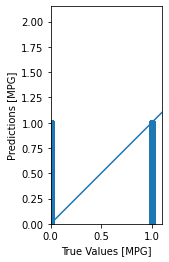

In [37]:
plt.scatter(label_test_input, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
class model_all(object):
    def model_fit(self, model, n_batch_size=256, n_epochs=5):
        num_factors=self.num_factors
        model=self.model
        